In [110]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [13, 9]
# plt.close('all')

filename = "./covid-19-data-owid/public/data/ecdc/full_data.csv"
df = pd.read_csv(filename)
df.head()
# [print(x) for x in df.columns.tolist()]

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [111]:
asialist = ['Philippines','Indonesia','Japan','Thailand','Malaysia','Singapore','Australia','New Zealand']
asiapop_dict = {'Philippines':106700000,
    'Indonesia':267700000,
    'Japan':126500000,
    'Thailand':69430000,
    'Malaysia':31530000,
    'Singapore':5639000,
    'Australia':24990000,
    'New Zealand':4886000}

asia_df = df.loc[df['location'] == asialist[0]].copy()
asia_df.set_index('date', inplace=True)
startdate = str(pd.Timestamp('2020-03-01').date())
today = dt.datetime.now()
enddate = str(today.date())
print(startdate, enddate)
asia_df = asia_df.loc[startdate:enddate]
print(asia_df.columns.tolist())
asia_df['shiftertest'] = asia_df['new_cases'].shift(1)
# asia_df[['location','new_cases','shiftertest']].tail(10)
asia_df.tail()



2020-03-01 2020-07-15
['location', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases', 'biweekly_deaths']


,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,shiftertest
date,,,,,,,,,,
2020-07-11,Philippines,1160.0,42.0,52914.0,1360.0,12578.0,80.0,18841.0,136.0,1395.0
2020-07-12,Philippines,1308.0,12.0,54222.0,1372.0,12392.0,82.0,19419.0,136.0,1160.0
2020-07-13,Philippines,2037.0,162.0,56259.0,1534.0,14429.0,244.0,20804.0,290.0,1308.0
2020-07-14,Philippines,747.0,65.0,57006.0,1599.0,10673.0,296.0,20568.0,344.0,2037.0
2020-07-15,Philippines,539.0,4.0,57545.0,1603.0,9672.0,294.0,20031.0,337.0,747.0


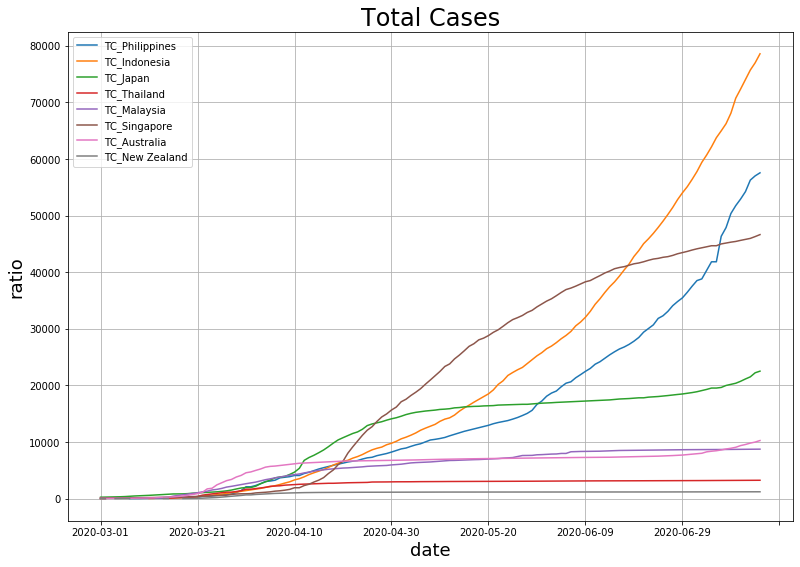

In [112]:
def total_cases(alist, startdate, df, excludelist=[], kind='line', permil = False, pop_dict={}):
    countrylist = alist.copy()
    newplot_df = pd.DataFrame()
    tc_cols_list = []
    today = dt.datetime.now()
    for x in excludelist:
        if x in countrylist:
            countrylist.remove(x)
            
    for c in countrylist:
        country_df = df.loc[df['location'] == c].copy()
        country_df.set_index('date', inplace=True)
        dateslist = country_df[country_df.new_deaths >= 5].index.tolist()
        if len(dateslist) > 0:
            if dateslist[0] < startdate:
                startdate = dateslist[0]
        country_df = country_df.loc[startdate:]    
        tc_header = 'TC_' + c
        tc_cols_list.append(tc_header)
        if permil:
            country_pop = pop_dict[c]
            country_df[tc_header] = round(country_df['total_cases'] / country_pop * 1000000, 1)
            country_df.drop(axis=1, labels=['total_cases'], inplace=True)
            chart_title = 'Total Cases per Million'
        else:
            country_df.rename(columns = {'total_cases' : tc_header}, inplace=True)
            chart_title = 'Total Cases'
        
        if newplot_df.empty:
            newplot_df = country_df[[tc_header]]
        else:
            newplot_df = newplot_df.merge(country_df[[tc_header]], how='inner', left_index=True, right_index=True)

    if kind=='line':
        ax = newplot_df.plot()
        ax.grid()
        plt.xlabel('date', fontsize=18)
        plt.ylabel('ratio', fontsize=18)
        plt.title(chart_title, fontsize=24)
    elif kind=='bar':
        xpos = np.arange(len(countrylist))
        valslist = newplot_df.loc[enddate].tolist()
        plt.xticks(xpos, countrylist)
        plt.bar(xpos, valslist, align='center', width=0.6)
        plt.title(chart_title, fontsize=24)
    
startdate = str(pd.Timestamp('2020-03-01').date())
total_cases(asialist, startdate, df, permil=False)

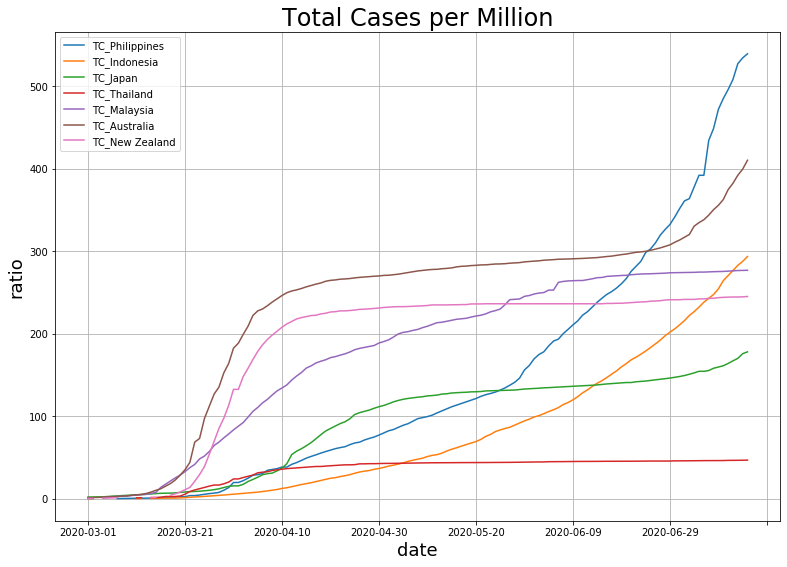

In [113]:
total_cases(asialist, startdate, df, permil=True, pop_dict=asiapop_dict, excludelist=['Singapore'])

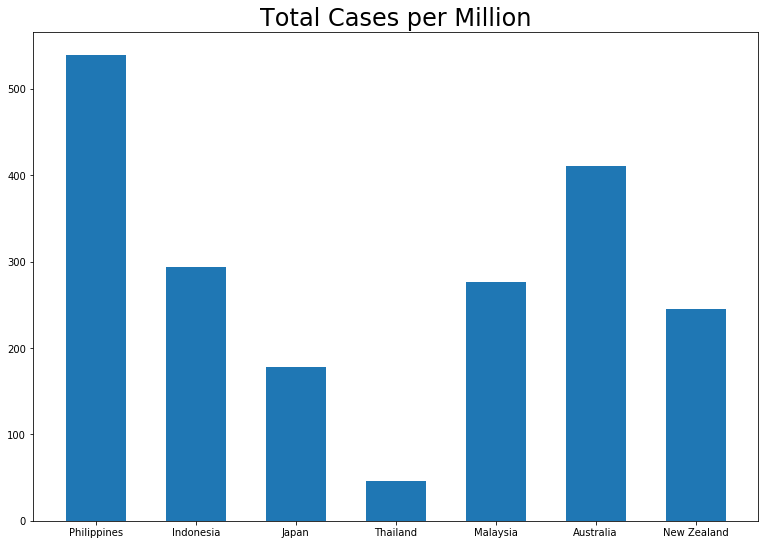

In [127]:
total_cases(asialist, startdate, df, permil=True, pop_dict=asiapop_dict, excludelist=['Singapore'], kind='bar')

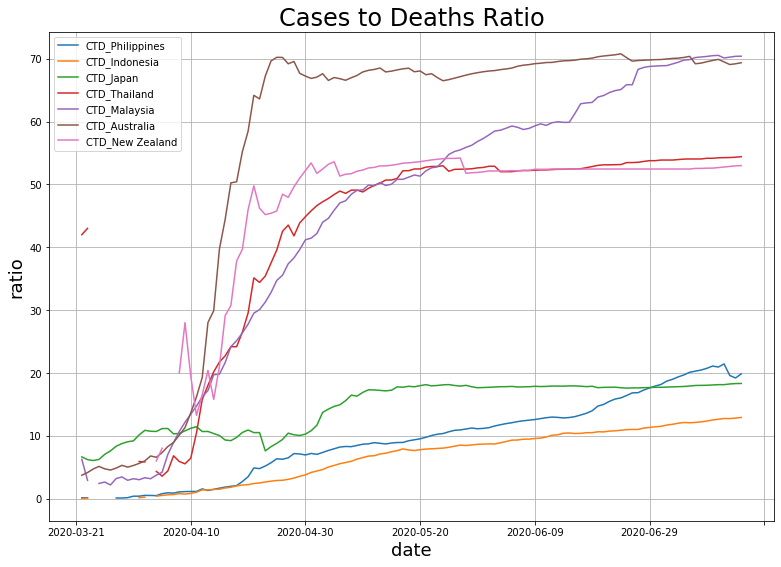

In [114]:


def ctd_ratio(alist, startdate, df, excludelist=[], kind='line'):
    countrylist = alist.copy()
    newplot_df = pd.DataFrame()
    ctd_cols_list = []
    today = dt.datetime.now()
    
    for x in excludelist:
        if x in countrylist:
            countrylist.remove(x)
    for c in countrylist:
        country_df = df.loc[df['location'] == c].copy()
        country_df.set_index('date', inplace=True)
        dateslist = country_df[country_df.new_deaths >= 5].index.tolist()
        if len(dateslist) > 0:
            if dateslist[0] < startdate:
                startdate = dateslist[0]
        country_df = country_df.loc[startdate:]    
        country_df['cases_shift'] = country_df['total_cases'].shift(21)
        # CASES TO DEATH RATIO
        ctd_header = 'CTD_' + c
        country_df[ctd_header] = round(country_df['cases_shift'] / country_df['total_deaths'],2)
        country_df.drop(axis=1, labels=['cases_shift'], inplace=True)
        ctd_cols_list.append(ctd_header)
        if newplot_df.empty:
            newplot_df = country_df[[ctd_header]]
        else:
            newplot_df = newplot_df.merge(country_df[[ctd_header]], how='inner', left_index=True, right_index=True)

    if kind=='line':
        ax = newplot_df.plot()
        ax.grid()
        plt.xlabel('date', fontsize=18)
        plt.ylabel('ratio', fontsize=18)
        plt.title('Cases to Deaths Ratio', fontsize=24)
    elif kind=='bar':
        xpos = np.arange(len(countrylist))
        valslist = newplot_df.loc[enddate].tolist()
        plt.xticks(xpos, countrylist)
        plt.bar(xpos, valslist, align='center', width=0.6)
        plt.title('Cases to Deaths Ratio', fontsize=24)
    
startdate = str(pd.Timestamp('2020-03-01').date())
ctd_ratio(asialist, startdate, df, excludelist=['Singapore'])


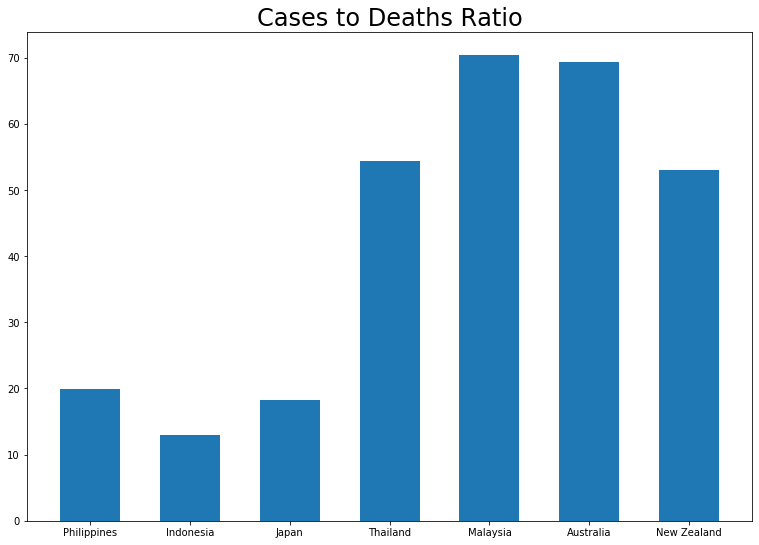

In [115]:
ctd_ratio(asialist, startdate, df, excludelist=['Singapore'], kind='bar')

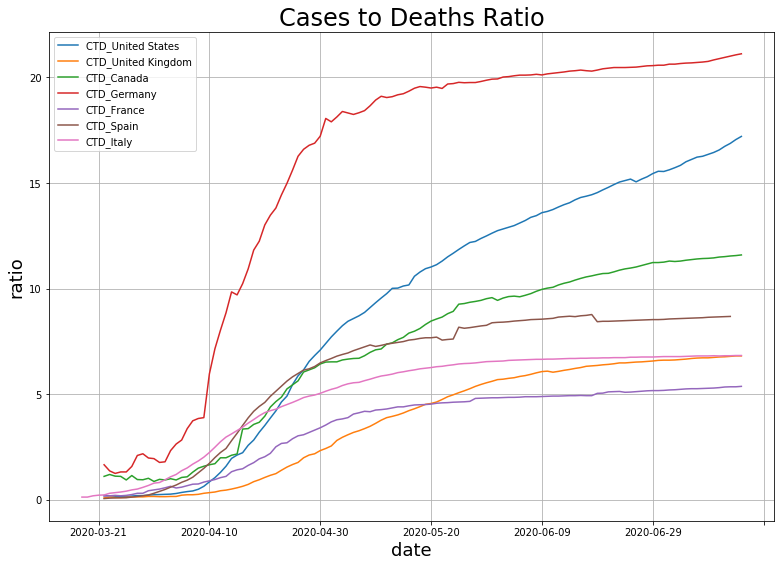

In [116]:
westlist = ['United States','United Kingdom','Canada','Germany','France','Spain','Italy','Russia']
startdate = str(pd.Timestamp('2020-03-01').date())
ctd_ratio(westlist, startdate, df, excludelist=['Russia'])

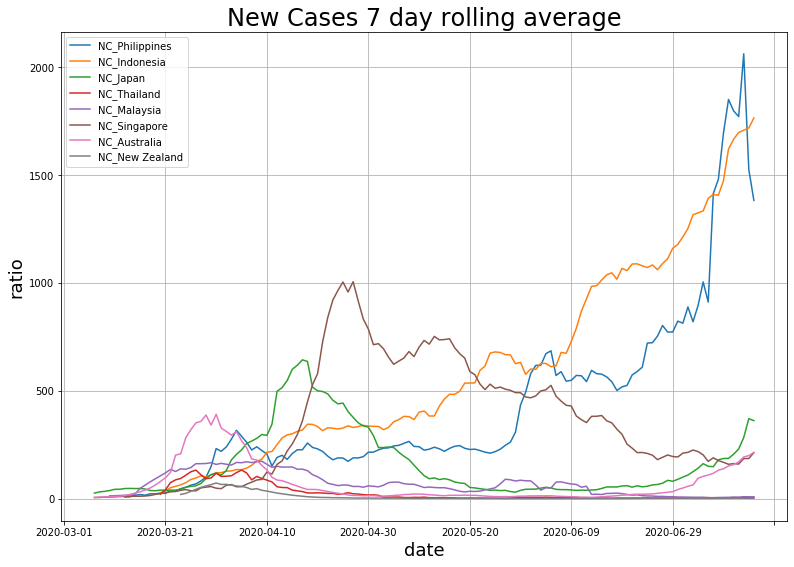

In [117]:
# new cases 7 day rolling average
# modified to do the same calculations for new deaths

def new_cases(alist, startdate, df, excludelist=[], kind='line', ROC=False, casetype='cases'):
    countrylist = alist.copy()
    newplot_df = pd.DataFrame()
    nc_cols_list = []
    today = dt.datetime.now()
    enddate = str(today.date())
    if casetype == 'cases':
        titleitem = 'Cases'
        hdritem = 'new_cases'
    elif casetype == 'deaths':
        titleitem = 'Deaths'
        hdritem = 'new_deaths'
    
    for x in excludelist:
        if x in countrylist:
            countrylist.remove(x)
    for c in countrylist:
        country_df = df.loc[df['location'] == c].copy()
        country_df.set_index('date', inplace=True)
        country_df = country_df.loc[startdate:enddate]    
        nc_header = 'NC_' + c
        country_df[nc_header] = country_df[hdritem].rolling(7).mean()
        country_df[nc_header] = round(country_df[nc_header],1)
        if ROC:
            ncroc_hdr = nc_header + '_ROC'
            country_df[ncroc_hdr] = (country_df[nc_header] - country_df[nc_header].shift(1)) / country_df[nc_header].shift(1) * 100
            country_df[ncroc_hdr] = country_df[ncroc_hdr].rolling(7).mean()
            country_df[ncroc_hdr] = round(country_df[ncroc_hdr],1)
            country_df.drop(axis=1, labels=[nc_header], inplace=True)
            nc_cols_list.append(ncroc_hdr)
            roctitle = ' Rate of Change Pct'
            ylabelstr = 'Percent ROC'
            if newplot_df.empty:
                newplot_df = country_df[[ncroc_hdr]]
            else:
                newplot_df = newplot_df.merge(country_df[[ncroc_hdr]], how='inner', left_index=True, right_index=True)
        else:
            nc_cols_list.append(nc_header)
            roctitle = ''
            ylabelstr = 'ratio'
            if newplot_df.empty:
                newplot_df = country_df[[nc_header]]
            else:
                newplot_df = newplot_df.merge(country_df[[nc_header]], how='inner', left_index=True, right_index=True)

    fulltitlestr = 'New ' + titleitem + ' 7 day rolling average' + roctitle
    if kind=='line':
        ax = newplot_df.plot()
        ax.grid()
        plt.xlabel('date', fontsize=18)
        plt.ylabel(ylabelstr, fontsize=18)
        plt.title(fulltitlestr, fontsize=24)
    elif kind=='bar':
        xpos = np.arange(len(countrylist))
        valslist = newplot_df.loc[enddate].tolist()
#         ax = newplot_df.plot()
        plt.grid(axis='y')
        plt.xticks(xpos, countrylist)
        plt.ylabel(ylabelstr, fontsize=18)
        plt.bar(xpos, valslist, align='center', width=0.5)
        plt.title(fulltitlestr + ' today snapshot', fontsize=24)
        
    
new_cases(asialist, startdate, df)


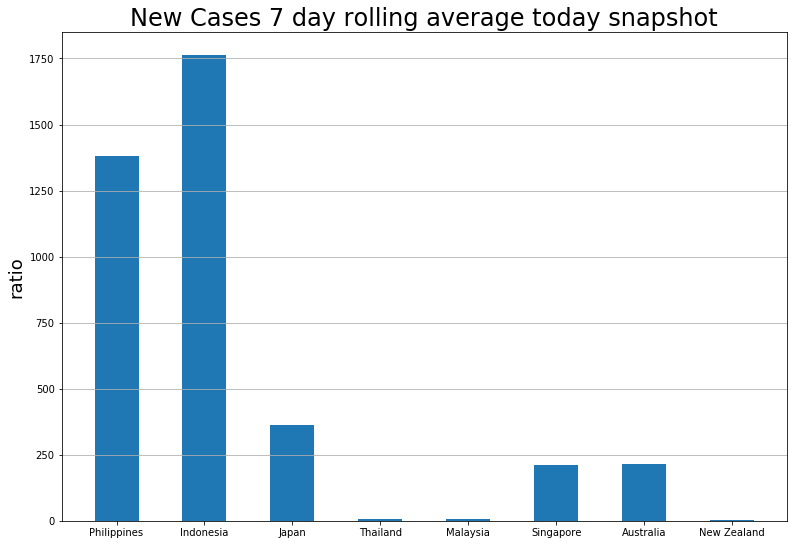

In [118]:
new_cases(asialist, startdate, df, kind='bar')

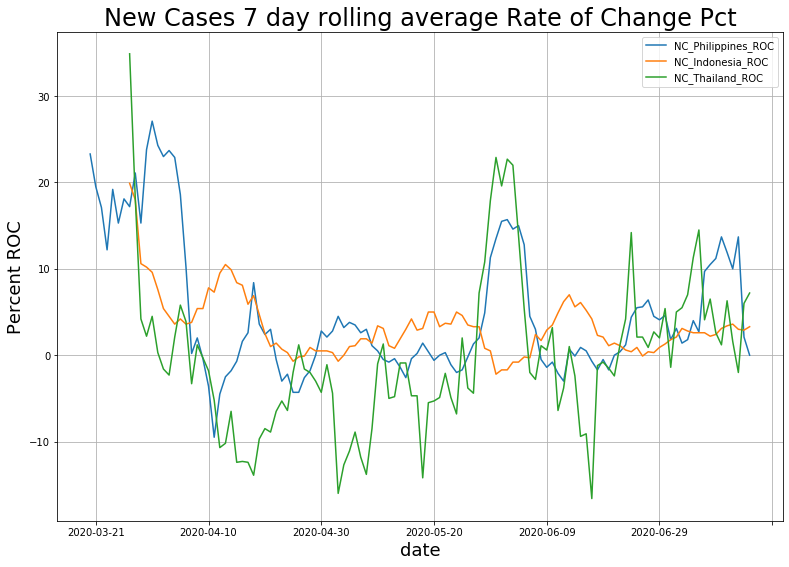

In [119]:
new_cases(['Philippines','Indonesia','Thailand'], startdate, df, ROC=True)

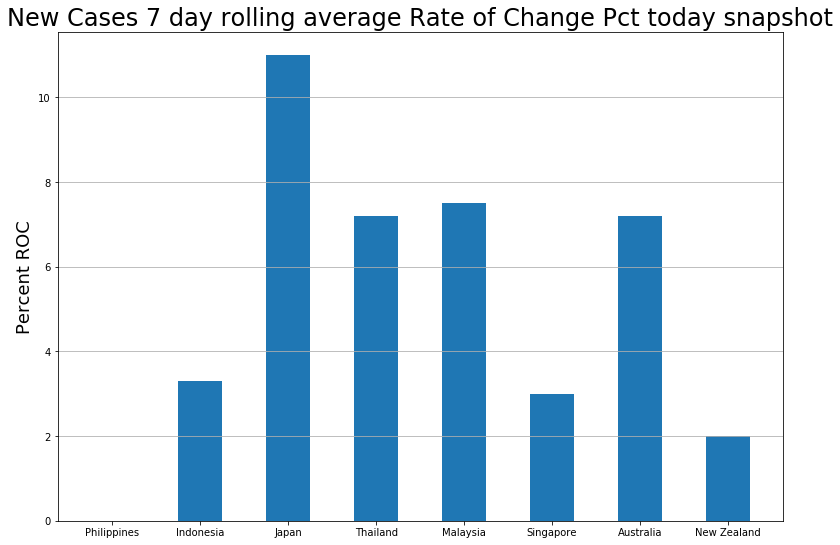

In [120]:
new_cases(asialist, startdate, df, kind='bar', ROC=True)

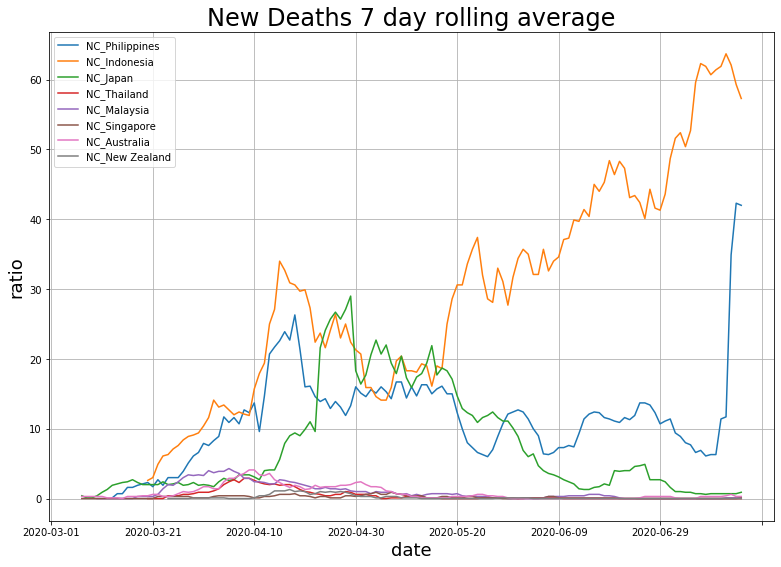

In [121]:
new_cases(asialist, startdate, df, casetype='deaths')

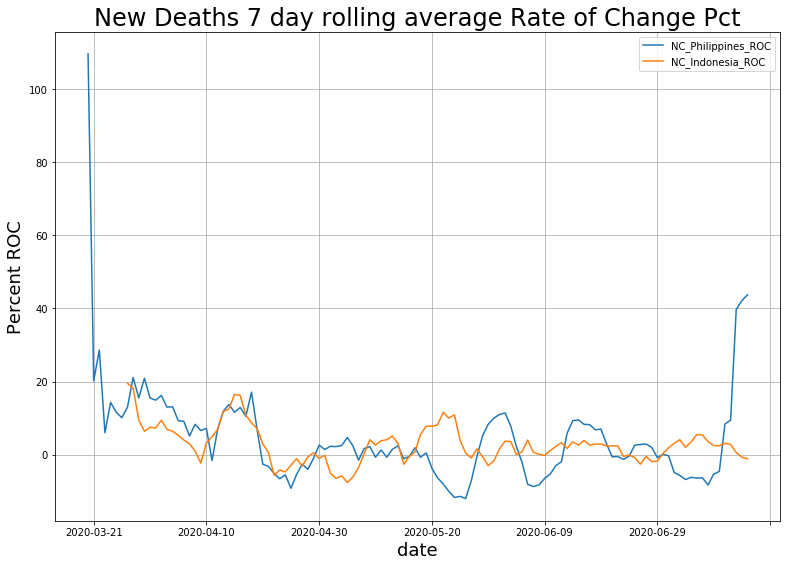

In [122]:
new_cases(['Philippines','Indonesia'], startdate, df, casetype='deaths', ROC=True)

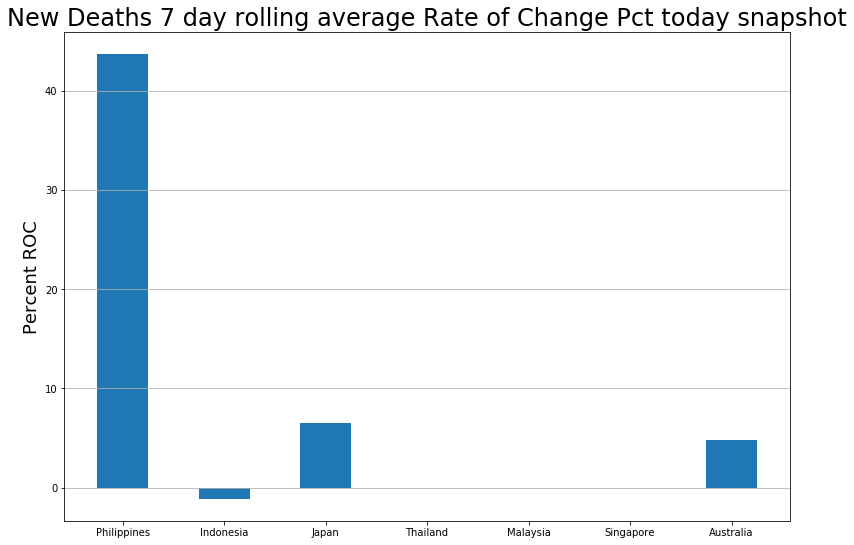

In [123]:
new_cases(asialist, startdate, df, casetype='deaths', ROC=True, kind='bar')

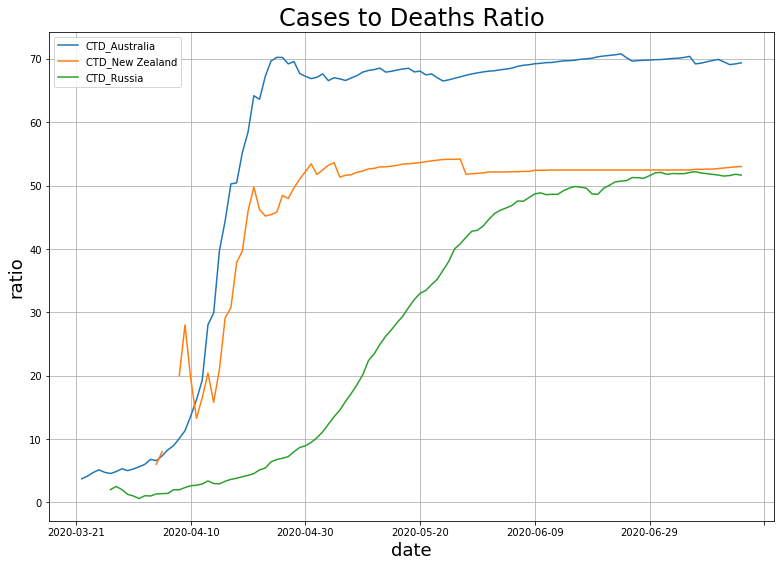

In [124]:
ctd_ratio(['Australia','New Zealand','Russia'], startdate, df)